In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
dataset_path = "/content/drive/MyDrive/17Flowers/train"
img_data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
dataset_train = img_data_gen.flow_from_directory(dataset_path,target_size=(224,224),subset="training")
dataset_validation = img_data_gen.flow_from_directory(dataset_path,target_size=(224,224),subset="validation")
print(dataset_train.class_indices)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}


In [5]:
model = models.Sequential()
model.add(layers.Input(shape=(224,224,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same",strides=(2,2)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="same",strides=(2,2)))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(17,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [6]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           2,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,627,345 (6.21 MB)

 Trainable params: 1,627,345 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(dataset_train,validation_data=dataset_validation,epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 414s 14s/step - accuracy: 0.0803 - loss: 2.8407 - val_accuracy: 0.2000 - val_loss: 2.3193
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.2707 - loss: 2.2203 - val_accuracy: 0.3263 - val_loss: 1.8406
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.4269 - loss: 1.7072 - val_accuracy: 0.5263 - val_loss: 1.4284
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.6327 - loss: 1.1518 - val_accuracy: 0.5263 - val_loss: 1.2464
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.7316 - loss: 0.8334 - val_accuracy: 0.5789 - val_loss: 1.1662
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.8752 - loss: 0.4687 - val_accuracy: 0.6000 - val_loss: 1.1950
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.9228 - loss: 0.2917 - val_accuracy: 0.5895 - val_loss: 1.2775
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.9644 - loss: 0.1736 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step


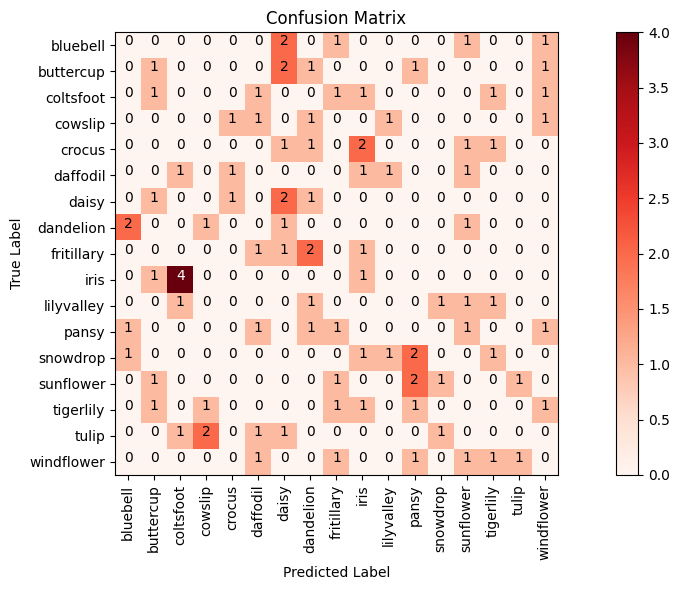

In [ ]:

y_pred = model.predict(dataset_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = dataset_validation.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()), rotation=90)
plt.yticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()))
plt.tight_layout()
plt.show()


In [12]:
dataset_path = "/content/drive/MyDrive/17Flowers/train"
dataset_path_test = "/content/drive/MyDrive/17Flowers/test"

img_data_gen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.1,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  rotation_range=30)

img_test_gen = ImageDataGenerator(rescale=1./255.0)


dataset_train = img_data_gen.flow_from_directory(dataset_path,target_size=(224,224),subset="training",shuffle=True)
dataset_validation = img_data_gen.flow_from_directory(dataset_path,target_size=(224,224),subset="validation",shuffle=False)

dataset_test = img_test_gen.flow_from_directory(dataset_path_test,target_size=(224,224))
print(dataset_test.class_indices)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.
Found 340 images belonging to 17 classes.
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}


In [13]:
model = models.Sequential()
model.add(layers.Input(shape=(224,224,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same",strides=(2,2)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="same",strides=(2,2)))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(17,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [14]:
history = model.fit(dataset_train,validation_data=dataset_validation,epochs=40)

Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 670ms/step - accuracy: 0.0724 - loss: 2.8173 - val_accuracy: 0.1579 - val_loss: 2.2329
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 673ms/step - accuracy: 0.2597 - loss: 2.2058 - val_accuracy: 0.3579 - val_loss: 1.6277
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 613ms/step - accuracy: 0.4123 - loss: 1.6879 - val_accuracy: 0.4842 - val_loss: 1.3919
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 670ms/step - accuracy: 0.4911 - loss: 1.4774 - val_accuracy: 0.5368 - val_loss: 1.2911
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 658ms/step - accuracy: 0.5389 - loss: 1.3467 - val_accuracy: 0.5579 - val_loss: 1.1839
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.5697 - loss: 1.2663 - val_accuracy: 0.5474 - val_loss: 1.1888
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.5968 - loss: 1.1305 - val_accuracy: 0.5789 - val_loss: 1.1721
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 654ms/step - accuracy: 0.6225 - loss: 1.0748 - val_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step


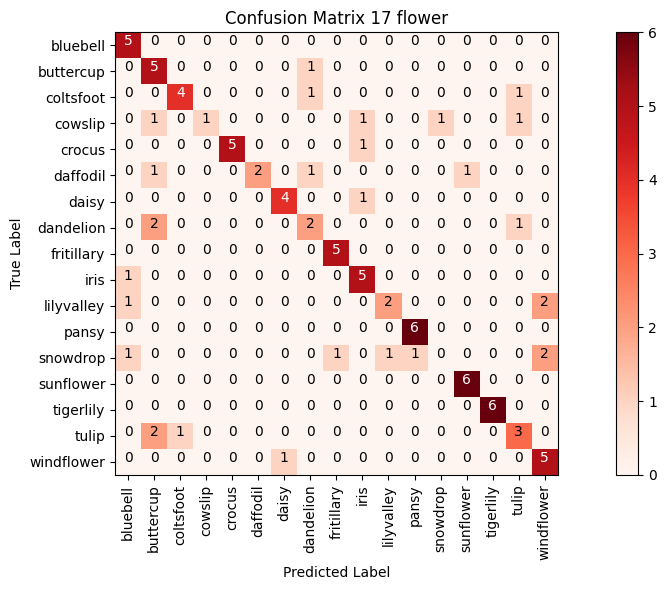

In [ ]:

y_pred = model.predict(dataset_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = dataset_validation.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix 17 flower')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()), rotation=90)
plt.yticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()))
plt.tight_layout()
plt.show()


In [16]:
model.save("model.h5")